<a href="https://colab.research.google.com/github/IvanOM-97/DPro-Exercises/blob/master/U22T1Wheat%26TheChessboardProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
PROBLEMA DEL TRIGO Y EL TABLERO DE AJEDREZ
Si se colocara trigo en cada casilla de un tablero de ajedrez,
de modo que se colocara un grano en la primera casilla, dos en la segunda, cuatro en la tercera,
y así sucesivamente (duplicando el número de granos en cada casilla subsiguiente),
¿cuántos granos de trigo habría en el tablero de ajedrez al final?

'''

In [1]:
'''
PROBLEMA 1: NUMERO DE GRANOS DE TRIGO EN UN TABLERO DE AJEDRES 2X2
Represente un tablero de ajedrez de 2x2 como un ndarray y calcule la cantidad de trigo en cada casilla. Después de colocar un trigo en la casilla superior izquierda, muévalo a la derecha, dos a la inferior izquierda, cuatro a la inferior derecha, y así sucesivamente. Transforme la forma del ndarray creado en el código de ejemplo.
'''
import numpy as np

# Initialize a 2x2 chessboard as a NumPy array
# Each cell will store the number of wheat grains
chessboard = np.zeros((2, 2), dtype=np.uint64)

# Fill the chessboard with grains doubling each time
# Start with 1 grain in the top-left and double for each next cell
grains = 1
for i in range(2):
    for j in range(2):
        chessboard[i][j] = grains
        grains *= 2

# Print the result
print("2x2 Chessboard with wheat grains:")
print(chessboard)

# Calculate the total number of grains on the board
total_grains = np.sum(chessboard)
print(f"Total grains on 2x2 chessboard: {total_grains}")

[[0 0]
 [0 0]]
2x2 Chessboard with wheat grains:
[[1 2]
 [4 8]]
Total grains on 2x2 chessboard: 15


In [8]:
'''
PROBLEMA 2: EXPANSION A nxm CUADRICULAS
  Cree una función que devuelva un ndarray con el número de granos en un tablero de ajedrez de nxm.
  Luego, use esta función para hallar el número de granos en un tablero de ajedrez de 8x8.
'''
import numpy as np

def generate_wheat_board(n, m):
    """
    Generate an nxm chessboard where each cell contains double the grains of the previous cell,
      starting from 1 grain at the top-left cell and increasing row-wise.

      Parameters:
      n (int): Number of rows
      m (int): Number of columns

      Returns:
      numpy.ndarray: An n x m array with wheat grain counts
    """
    board = np.zeros((n, m), dtype=np.uint64)
    grains = 1

    for i in range(n):
        for j in range(m):
            board[i][j] = grains
            grains *= 2

    return board

# Example usage
N = 8                     #number of rows
M = 8                     #number of columns
chessboard = generate_wheat_board(N, M)
print(f"{N}x{M} Wheat Chessboard:")
print(chessboard)

# Total grains
total = np.sum(chessboard)
print(f"Total grains: {total}")

8x8 Wheat Chessboard:
[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
       703687441776

Total grains on 8x8 chessboard: 18446744073709551615


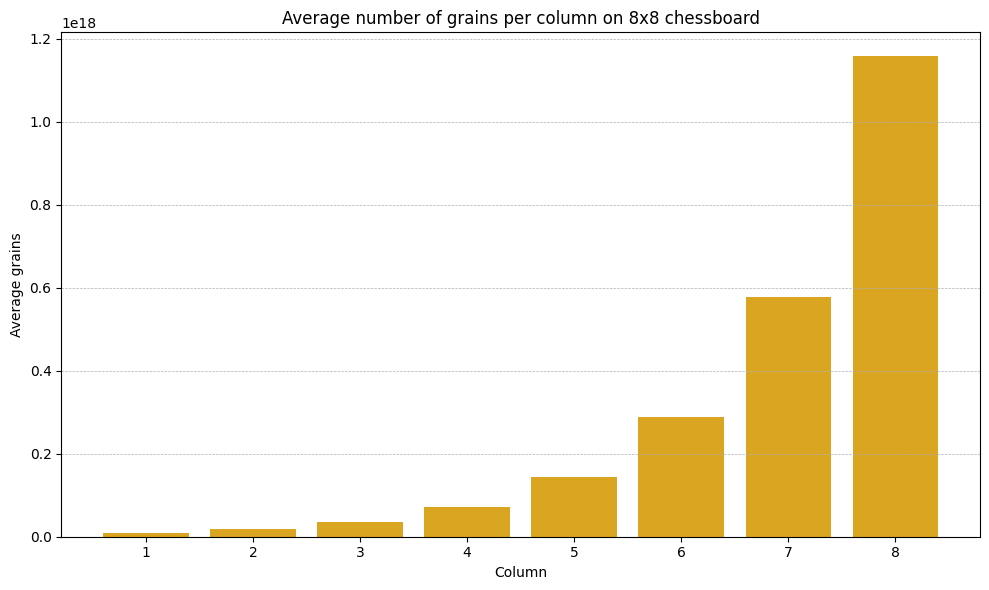

In [19]:
'''
PROBLEMA 3 - NUMERO TOTAL DE TRIGO
  Encuentra el número total de granos en un tablero de ajedrez de 8x8.
  Además, calcula el promedio de cada columna y visualízalo como un gráfico de barras.
'''
import numpy as np
import matplotlib.pyplot as plt

def generate_wheat_board(n, m):
    """
    Generate an nxm chessboard where each cell contains double the grains of the previous cell,
    starting from 1 grain at the top-left cell and increasing row-wise.
    """
    board = np.zeros((n, m), dtype=np.uint64)
    grains = 1
    for i in range(n):
        for j in range(m):
            board[i][j] = grains
            grains *= 2
    return board


# Create 8x8 wheat board
ROWS = 8
COLUMNS = 8
board_nxm = generate_wheat_board(ROWS, COLUMNS)

# Calculate total grains
total_grains = np.sum(board_nxm)
print(f"Total grains on 8x8 chessboard: {total_grains}")

# Calculate column averages
column_averages = np.mean(board_nxm, axis=0)

# Plot column averages as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(1, COLUMNS + 1), column_averages, color='goldenrod')
plt.xlabel("Column")
plt.ylabel("Average grains")
plt.title("Average number of grains per column on 8x8 chessboard")
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

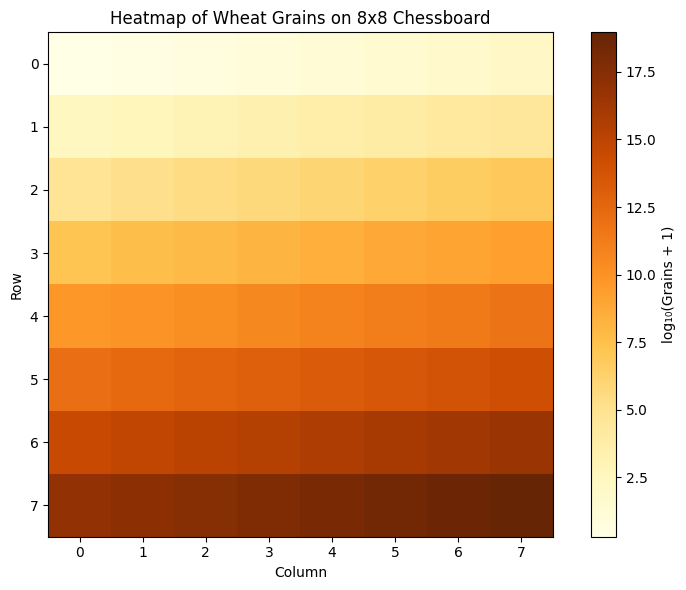

In [23]:
'''
PROBLEMA 4 - MAPA DE CALOR DE NRO DE TRIGO
Visualiza la cantidad de granos de trigo en un tablero de ajedrez de 8x8 como un mapa de calor.
Los mapas de calor son una técnica para representar visualmente grandes cantidades de datos en colores,
lo que te ayuda a comprender información numérica de un vistazo.
'''

import numpy as np
import matplotlib.pyplot as plt

def generate_wheat_board(n, m):
    """
    Generate an nxm chessboard where each cell contains double the grains of the previous cell,
    starting from 1 grain at the top-left cell and increasing row-wise.
    """
    board = np.zeros((n, m), dtype=np.uint64)
    grains = 1
    for i in range(n):
        for j in range(m):
            board[i][j] = grains
            grains *= 2
    return board

# Create 8x8 wheat board
board_8x8 = generate_wheat_board(8, 8)

# Plot heatmap of wheat distribution
plt.figure(figsize=(8, 6))
log_board = np.log10(board_8x8 + 1)  # Add 1 to avoid log(0)
plt.imshow(log_board, cmap='YlOrBr', interpolation='nearest')
plt.colorbar(label='log₁₀(Grains + 1)')
plt.title('Heatmap of Wheat Grains on 8x8 Chessboard')
plt.xlabel('Column')
plt.ylabel('Row')
plt.xticks(np.arange(8))
plt.yticks(np.arange(8))
plt.tight_layout()
plt.show()

Grains in first half (rows 0-3): 4294967295
Grains in second half (rows 4-7): 18446744069414584320
The second half has 4294967296 times more grains than the first half.


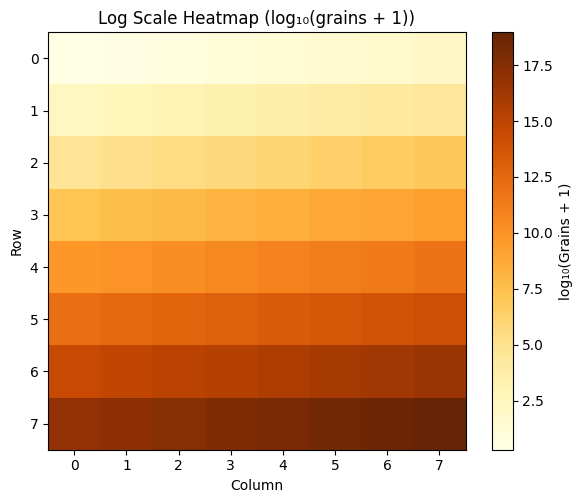

In [26]:
'''
PROBLEMA 5 - ¿CUANTAS VECES MAS GRANDE ES LA SEGUNDA MITAD QUE LA PRIMERA?
¿Cuál es el número de granos en la segunda mitad del tablero multiplicado por el número de granos en la primera mitad?
La primera mitad corresponde a las filas 0 a 3 de la matriz, y la segunda mitad a las filas 4 a 7.
'''

import numpy as np
import matplotlib.pyplot as plt

def generate_wheat_board(n, m):
    """
    Generate an nxm chessboard where each cell contains double the grains of the previous cell,
    starting from 1 grain at the top-left cell and increasing row-wise.
    """
    board = np.zeros((n, m), dtype=np.uint64)
    grains = 1
    for i in range(n):
        for j in range(m):
            board[i][j] = grains
            grains *= 2
    return board

def plot_heatmap_log(board):
    """
    Plot heatmap of a board using logarithmic scale.
    """
    log_board = np.log10(board + 1)
    plt.figure(figsize=(6, 5))
    plt.imshow(log_board, cmap='YlOrBr')
    plt.title("Log Scale Heatmap (log₁₀(grains + 1))")
    plt.colorbar(label='log₁₀(Grains + 1)')
    plt.xlabel("Column")
    plt.ylabel("Row")
    plt.tight_layout()
    plt.show()

# Generate 8x8 wheat board
board_8x8 = generate_wheat_board(8, 8)

# Calculate sum of first and second half
first_half_sum = np.sum(board_8x8[0:4, :])
second_half_sum = np.sum(board_8x8[4:8, :])

# Calculate how many times larger the second half is
ratio = second_half_sum / first_half_sum

# Display results
print(f"Grains in first half (rows 0-3): {first_half_sum}")
print(f"Grains in second half (rows 4-7): {second_half_sum}")
print(f"The second half has {ratio:.0f} times more grains than the first half.")

# Plot heatmaps
plot_heatmap_log(board_8x8)

In [6]:
'''
PROBLEMA 6 - EXTENSION A CUADRICULAS nxm UTILIZANDO OTROS METODOS DE CALCULOS
“Función que devuelve un ndarray que describe el número de trigo en el tablero de ajedrez de n × m de masa” similar al problema 2
Cree uno nuevo usando np.append () y uno usando broadcast.

Use esas funciones para encontrar nuevamente la cantidad de trigo en el tablero de ajedrez 8x8.
'''
import numpy as np

def generate_board_with_append(n, m):
    """
    Generate an nxm wheat board using np.append() to build the array.
    """
    total_cells = n * m
    grains = 1
    flat = np.array([], dtype = np.uint64)

    for _ in range(total_cells):
        flat = np.append(flat, grains)
        grains *= 2

    return flat.reshape((n, m))


def generate_board_with_broadcast(n, m):
    """
    Generate an nxm wheat board using broadcasting and vectorized power operation.
    """
    total_cells = n * m
    powers = np.arange(total_cells, dtype = np.uint64)
    board = 2 ** powers
    return board.reshape((n, m))

# Input n x m parameters
n_board = 8
m_board = 8

# Generate nxm wheat board using np.append
board_append = generate_board_with_append(n_board, m_board)
total_append = np.sum(board_append)
print(f"Total grains using np.append: {total_append}")
print(board_append)

# Generate nxm wheat board using broadcasting
board_broadcast = generate_board_with_broadcast(n_board, m_board)
total_broadcast = np.sum(board_broadcast)
print(f"Total grains using broadcasting: {total_broadcast}")
print(board_broadcast)

Total grains using np.append: 1.8446744073709552e+19
[[1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02]
 [2.56000000e+02 5.12000000e+02 1.02400000e+03 2.04800000e+03
  4.09600000e+03 8.19200000e+03 1.63840000e+04 3.27680000e+04]
 [6.55360000e+04 1.31072000e+05 2.62144000e+05 5.24288000e+05
  1.04857600e+06 2.09715200e+06 4.19430400e+06 8.38860800e+06]
 [1.67772160e+07 3.35544320e+07 6.71088640e+07 1.34217728e+08
  2.68435456e+08 5.36870912e+08 1.07374182e+09 2.14748365e+09]
 [4.29496730e+09 8.58993459e+09 1.71798692e+10 3.43597384e+10
  6.87194767e+10 1.37438953e+11 2.74877907e+11 5.49755814e+11]
 [1.09951163e+12 2.19902326e+12 4.39804651e+12 8.79609302e+12
  1.75921860e+13 3.51843721e+13 7.03687442e+13 1.40737488e+14]
 [2.81474977e+14 5.62949953e+14 1.12589991e+15 2.25179981e+15
  4.50359963e+15 9.00719925e+15 1.80143985e+16 3.60287970e+16]
 [7.20575940e+16 1.44115188e+17 2.88230376e+17 5.76460752e+17
  1.152921

In [1]:
'''
PROBLEMA 7 - COMPARACION DE TIEMPOS DE CALCULO
Mida el tiempo de cálculo de los diferentes métodos y determine cuál es el más eficiente.
Reducir el tiempo de cálculo también es un punto importante en la práctica.

'''

import numpy as np
import time

def generate_board_with_loop(n, m):
    """
    Generate an nxm wheat board using nested for loops.
    """
    board = np.zeros((n, m), dtype=np.uint64)
    grains = 1
    for i in range(n):
        for j in range(m):
            board[i][j] = grains
            grains *= 2
    return board

def generate_board_with_append(n, m):
    """
    Generate an nxm wheat board using np.append().
    """
    total_cells = n * m
    grains = 1
    flat = np.array([], dtype=np.uint64)

    for _ in range(total_cells):
        flat = np.append(flat, grains)
        grains *= 2

    return flat.reshape((n, m))

def generate_board_with_broadcast(n, m):
    """
    Generate an nxm wheat board using broadcasting.
    """
    total_cells = n * m
    powers = np.arange(total_cells, dtype=np.uint64)
    board = 2 ** powers
    return board.reshape((n, m))

# Size of the board
n, m = 8, 8

# Measure time for loop method
start = time.time()
board_loop = generate_board_with_loop(n, m)
end = time.time()
print(f"Loop method time: {end - start:.6f} seconds")

# Measure time for append method
start = time.time()
board_append = generate_board_with_append(n, m)
end = time.time()
print(f"Append method time: {end - start:.6f} seconds")

# Measure time for broadcast method
start = time.time()
board_broadcast = generate_board_with_broadcast(n, m)
end = time.time()
print(f"Broadcast method time: {end - start:.6f} seconds")

Loop method time: 0.000163 seconds
Append method time: 0.000550 seconds
Broadcast method time: 0.000158 seconds
